Today at work, I found myself facing an interesting problem. To compute an integral in the complex plane, I wanted to discretize the profile of a square in a regular way. Given that a circle is very easy to discretize using the roots of unity, I started searching for something analogous but for squares. It turns out this exists, and this notebook is about playing with this idea.

In the following sections, I'll first show how the discretization of the unit circle works in the complex plane. I'll then derive the analogous discretization for a unit square. Finally, I'll extend this to rectangles not centered on the origin of the plane.

# Discretization of the unit circle using the roots of unity

Using complex numbers, the exponential roots of unity allow us to replace a circle by points on the circle. This is demonstrated using the following function:

In [1]:
from cmath import exp, pi

def make_unit_disk(N):
    "Returns N complex numbers on the unit circle (roots of unity)."
    return [exp(2j * pi * i / N) for i in range(N)]

We can plot our approximation using a function that accepts any list of complex numbers.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
def plot_complex(points, *args, **kwargs):
    "Plots each point in the argument list."
    for p in points:
        plt.plot(p.real, p.imag, *args, **kwargs)

(-1.1, 1.1)

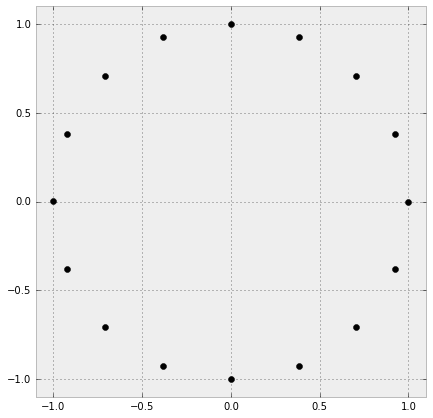

In [4]:
plt.figure(figsize=(7, 7))
roots = make_unit_disk(16)
plot_complex(roots, 'ko')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Discretizing the unit square 

The above formula works nicely with circles and can be extended to any number of points. However, what if we want a square contour? We can use the roots of unity and then transform them until the end up on the unit square, as suggested by the next figure:

(-1.1, 1.1)

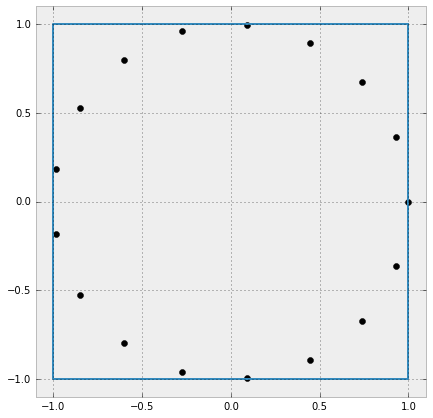

In [5]:
plt.figure(figsize=(7, 7))
roots = make_unit_disk(17)
plot_complex(roots, 'ko')
plt.plot([1, -1, -1, 1, 1], [1, 1, -1, -1, 1])
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

How do we do this? Quite simply by remarking that our square can be divided using four quadrants for which simple formulas apply:

(-1.1, 1.1)

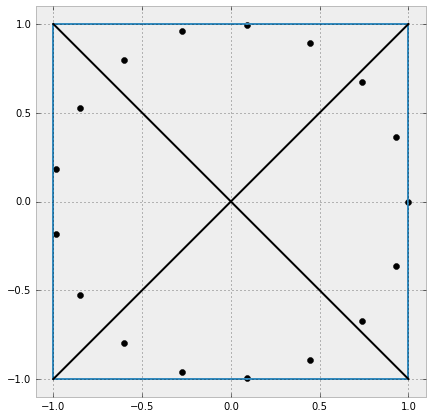

In [6]:
plt.figure(figsize=(7, 7))
roots = make_unit_disk(17)
plot_complex(roots, 'ko')
plt.plot([1, -1, -1, 1, 1], [1, 1, -1, -1, 1])
plt.plot([1, -1], [1, -1], 'k')
plt.plot([-1, 1], [1, -1], 'k')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

Let's code a function that does this:

In [7]:
from math import copysign
sign = lambda x: copysign(1, x)

def make_unit_square(N):
    "Returns N complex numbers on the unit square using the roots of unity."
    roots = make_unit_disk(N)
    square = []
    for p in roots:
        u, v = p.real, p.imag
        if u**2 >= v**2:
            x = sign(u)
            y = v/u * sign(u)
        else:
            y = sign(v)
            x = u/v * sign(v)
        square.append(x + 1j * y)
    return square

Let's test this:

In [8]:
sign(-1)

-1.0

In [9]:
sign(-2)

-1.0

(-1.1, 1.1)

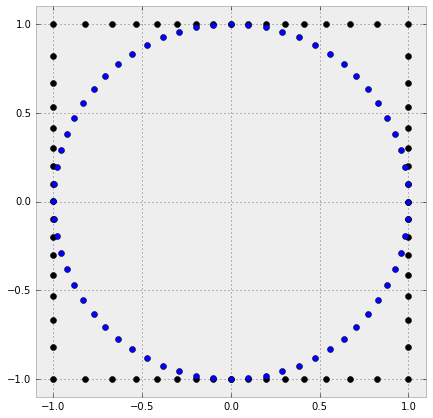

In [10]:
plt.figure(figsize=(7, 7))
square = make_unit_square(64)
plot_complex(square, 'ko')
roots = make_unit_disk(64)
plot_complex(roots, 'bo')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

We can add some fancy lines to emphasize where each point came from.

(-1.1, 1.1)

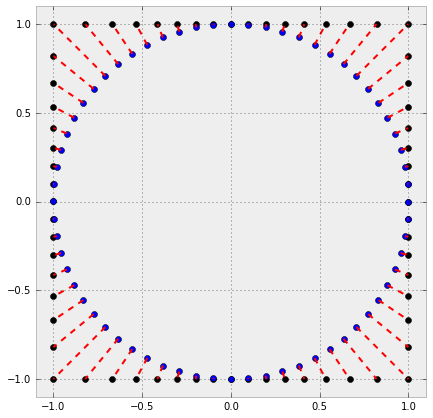

In [19]:
plt.figure(figsize=(7, 7))
square = make_unit_square(64)
plot_complex(square, 'ko')
roots = make_unit_disk(64)
plot_complex(roots, 'bo')
for a, b in zip(roots, square):
    plt.plot([a.real, b.real], [a.imag, b.imag], 'r--')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

This works the way we want it to be. What about the case when we want to extend this construction to rectangles?

# Rectangles 

In the case of rectangles, the easy solution is to switch to a different coordinate system. We still assume that we're centered on the origin of the complex plane. By multiplying by constants, we can scale each axis indepently, namely by width and height. The idea is thus:

- take an input rectangle
- reshape it to be a unit square and compute the scaling factors
- approximate the unit square with the given number of points
- scale the points to obtain the input rectangle

In [11]:
def make_rectangle(width, height, N):
    "Approximates rectangle of given height and width using N points in total."
    square = make_unit_square(N)
    f_x = width / 2.
    f_y = height / 2.
    return [p.real * f_x + 1j * p.imag * f_y for p in square]

(-2.1, 2.1)

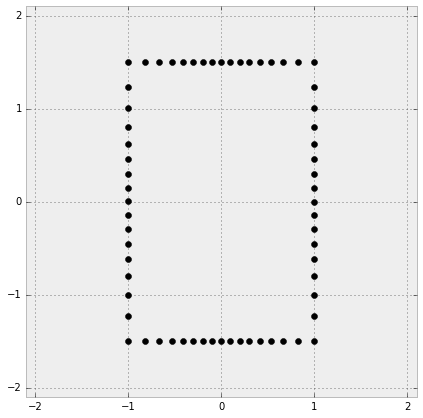

In [20]:
plt.figure(figsize=(7, 7))
rect = make_rectangle(2, 3, 64)
plot_complex(rect, 'ko')
plt.xlim(-2.1, 2.1)
plt.ylim(-2.1, 2.1)

As can be seen in the picture above, we obtain a rectangle that's 2 by 3.

# Shifted rectangles 

What about if we want to shif the rectangle to an arbitrary position? Easy! In the complex plane, it's just like a vector addition: simply add an offset to each point.

In [13]:
def make_shifted_rectangle(width, height, origin, N):
    """Approximates rectangle of given height and width using N points in total.
    The rectangle is centered at the given origin (complex number)."""
    rect = make_rectangle(width, height, N)
    return [p + origin for p in rect]

Let's test this:

(-2.1, 2.1)

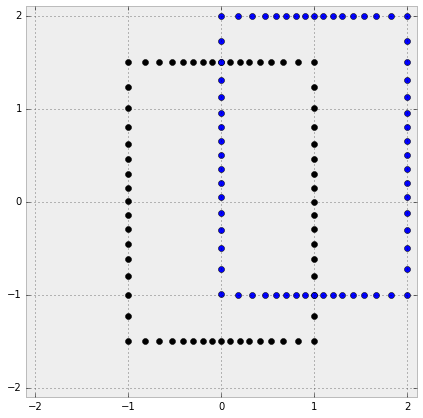

In [25]:
plt.figure(figsize=(7, 7))
rect = make_rectangle(2, 3, 64)
plot_complex(rect, 'ko')
shifted_rect = make_shifted_rectangle(2, 3, 1 + 0.5j, 64)
plot_complex(shifted_rect, 'bo')
plt.xlim(-2.1, 2.1)
plt.ylim(-2.1, 2.1)

# Conclusions

In this post, we've seen how to discretize an arbitrary rectangle using a nonlinear mapping method based on the roots of unity. There are many other mapping methods that can accomplish this task, but we've focused on this one as it is really simple to implement. Observing the last image one sees that due to the starting points on the disk, the corners of the rectangle are less densely filled with points compared to the midpoints of the edges. Depending on what you need this discretization for, this may be a problem. 

If you're interested other mappings of disks to squares (and reverse mappings also), you can check out this very interesting [review of analytical methods for squaring the disc by Chamberlain Fong](http://arxiv.org/abs/1509.06344).